<a href="https://colab.research.google.com/github/dantecomedia/Hepatitis-Detection/blob/master/hepatitis_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [0]:

data=pd.read_csv("hepatitis.csv")

X=data.iloc[:,1:-1]

y=data.iloc[:,0]

In [6]:

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
class             142 non-null int64
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB
None
            class         age         sex     steroid  antivirals     fatigue  \
count  142.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bb813d7f0>,
      dtype=object)

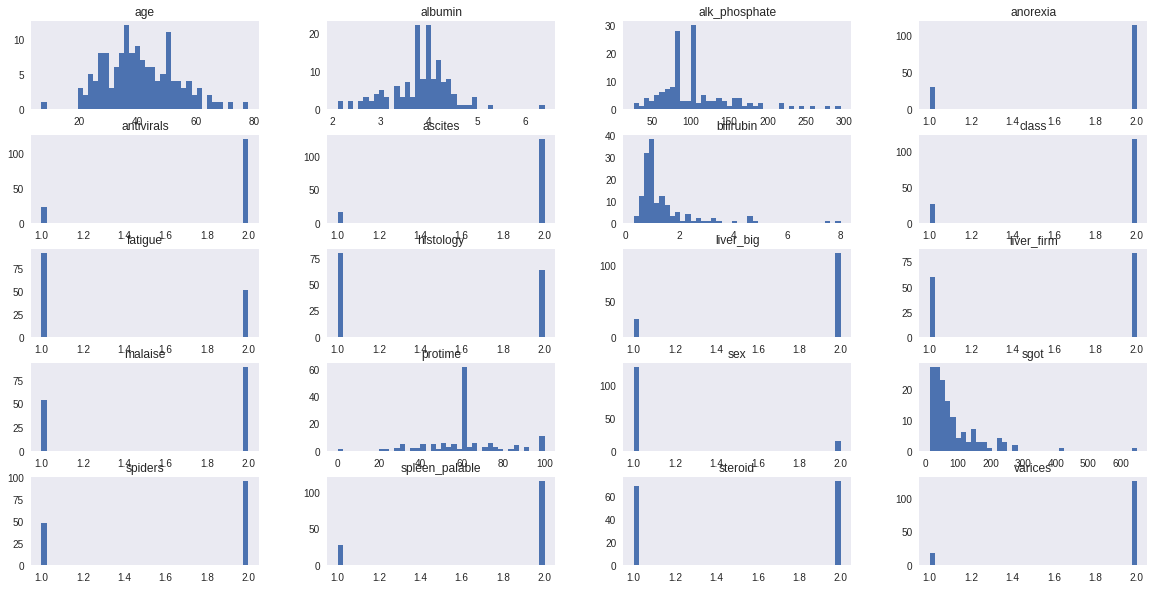

In [21]:
data.hist(figsize=(20,10),grid=False, bins=40)


In [14]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.decomposition import PCA
pc=PCA(n_components=4)

X=pc.fit_transform(X) 

In [0]:

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=None)

KERNEL : rbf
0.8888888888888888


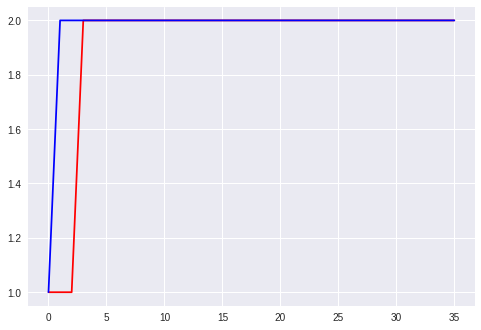

0.9722222222222222


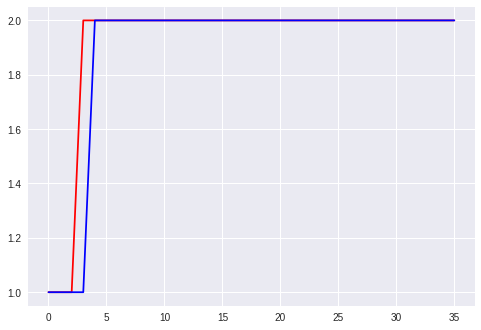

0.9722222222222222


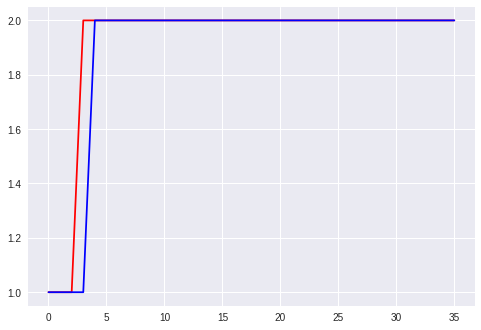

0.9722222222222222


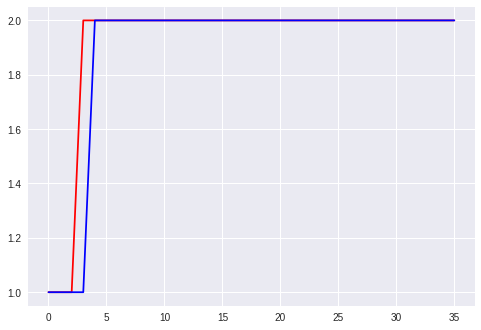

0.9444444444444444


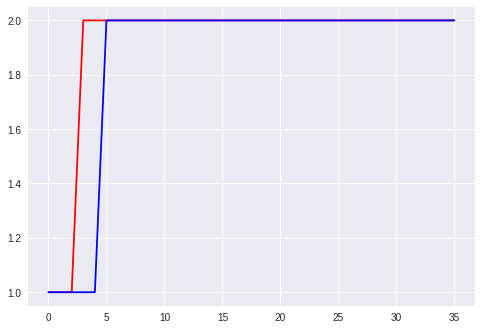

0.9444444444444444


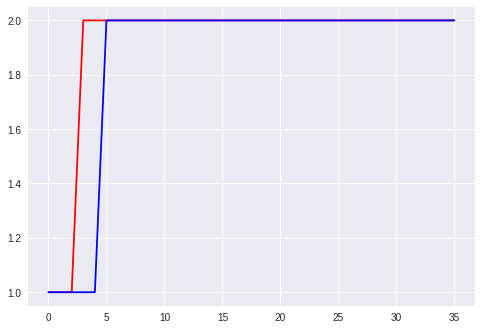

0.9444444444444444


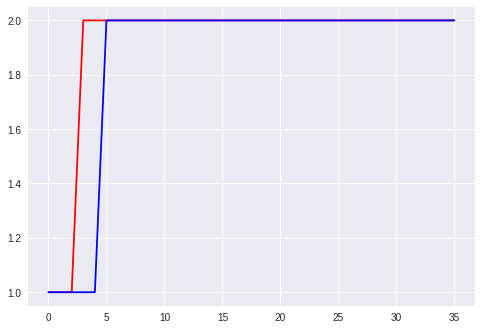

0.9444444444444444


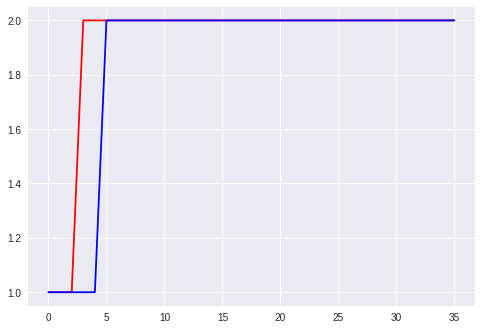

0.9444444444444444


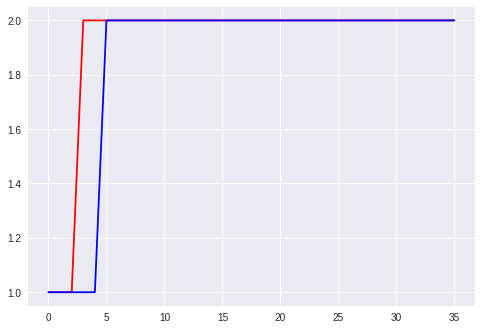

0.9444444444444444


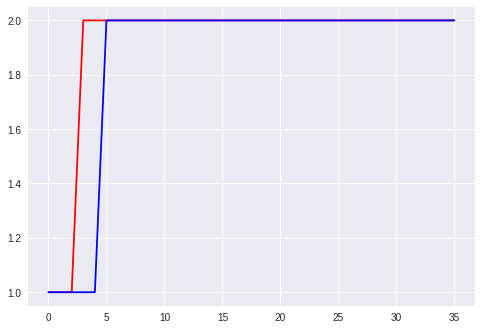

KERNEL : linear
0.9444444444444444


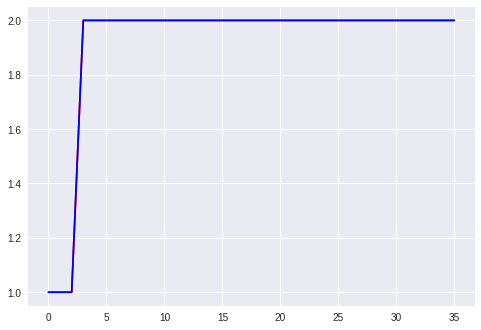

0.9444444444444444


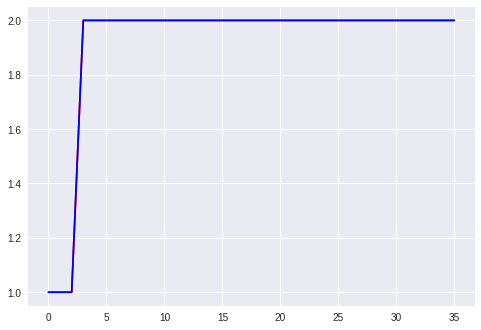

0.9444444444444444


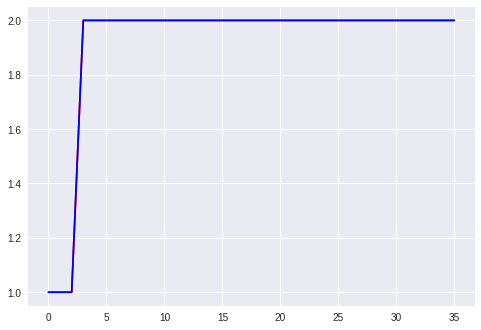

0.9444444444444444


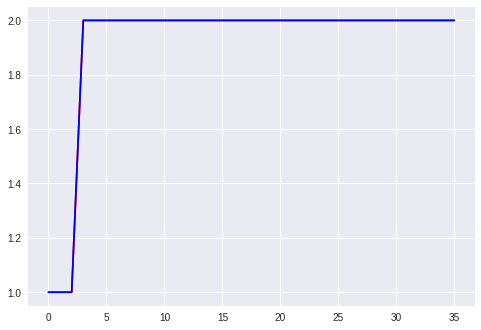

0.9444444444444444


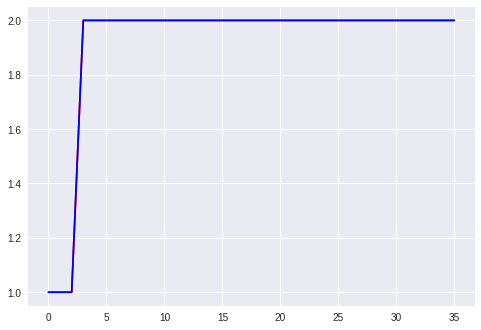

0.9444444444444444


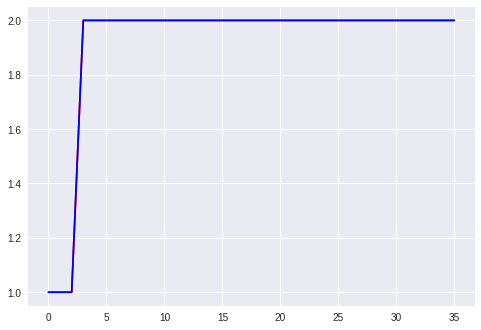

0.9444444444444444


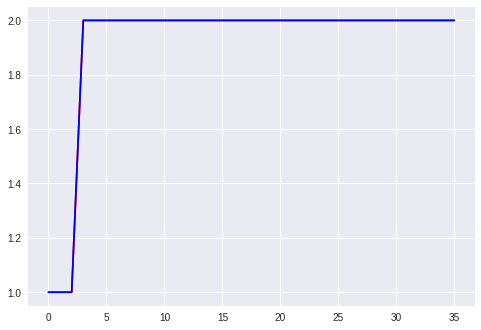

0.9444444444444444


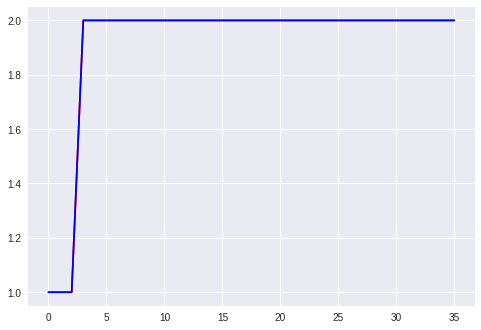

0.9444444444444444


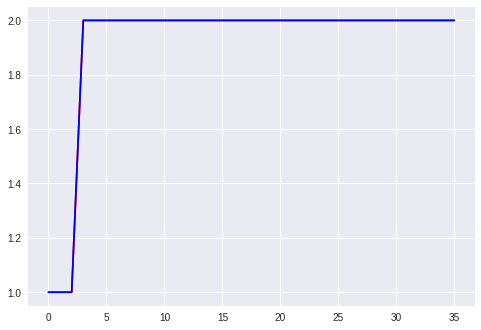

0.9444444444444444


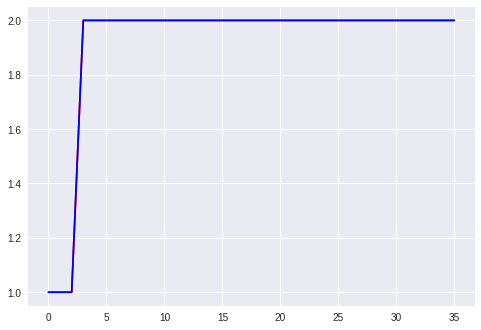

In [17]:
from sklearn.metrics import accuracy_score
def model_compute():
    k=['rbf','linear']
    for i in k:
        print("KERNEL :",i)
        for j in range(1,11):
            model=svm.SVC(kernel=i, C=j,gamma=1)
            model.fit(X_train,y_train)
            y_pred=model.predict(X_test)
            accuracy =accuracy_score(y_test,y_pred)
            print(accuracy)
            y_1=plt.plot(sorted(y_test),color='red',label='Y_test')
            y_2=plt.plot(sorted(y_pred),color='blue',label='Y_pred')
            """plt.legend(handles=[y_1])
            plt.legend(handles=[y_2]) """
            plt.show()
        
model_compute() 